# Plotting methods using pandas and matplotlib

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
def sub_plot(df, Year, location):
    """A function to make subplots by age group for a location and year"""
    
    age_groups = df.Age.unique()
    
    ncols = int(len(age_groups)-1) # -1 to exclude 'all age groups'
    nrows = 1
    
    fig, axs = plt.subplots(nrows, ncols, sharey=True, figsize=(20,3*nrows))
    #fig.figsize=(20,15)
    
    ax_count = 0
    
    for age in age_groups:
        if age == "All age groups":
            continue
        else:
            plot_mask = (df["Year"]==Year) & (df["Location"]==location) & (df["Age"]==age)
            plot_data = df[plot_mask]

            mask_male = (plot_data["Sex"]=="Males")
            mask_female = (plot_data["Sex"]=="Females")
            plot_data_men = plot_data[mask_male]
            plot_data_women = plot_data[mask_female]

            title = plot_data_women.head(1)["Age"].values[0]

            plot_data_men.plot.bar(x="Income", y="percentage", 
                                   ax=axs[ax_count], 
                                   color="#e41a1c", 
                                   title=title,
                                   label="Men",
                                   alpha = 0.75)

            plot_data_women.plot.bar(x="Income", y="percentage", 
                                     ax=axs[ax_count], 
                                     color="#377eb8", 
                                     title=title,
                                     label = "Women",
                                     alpha = 0.4)

            #axs[ax_count].legend(["Males", "Females"]) 
            axs[ax_count].set_ylabel("{} (percentage)".format(location))

            ax_count+=1
            
    return fig

def save_figs(fig):
    figure_path = root_directory + "\\figures\\"
    #fig_path = "{}{}.png".format(figure_path, location).replace(" ", "_")
    #fig_path = fig_path.replace(",", "")
    #fig.savefig(fig_path)
    
def plot_figs_for(locations, df):
    """plot figure for each location in list of locations"""
    for location in locations:
        fig = sub_plot(df, 2016, location)
        save_figs(fig)

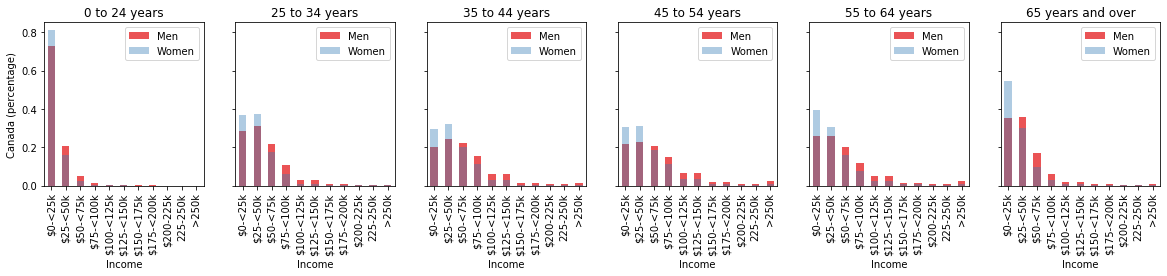

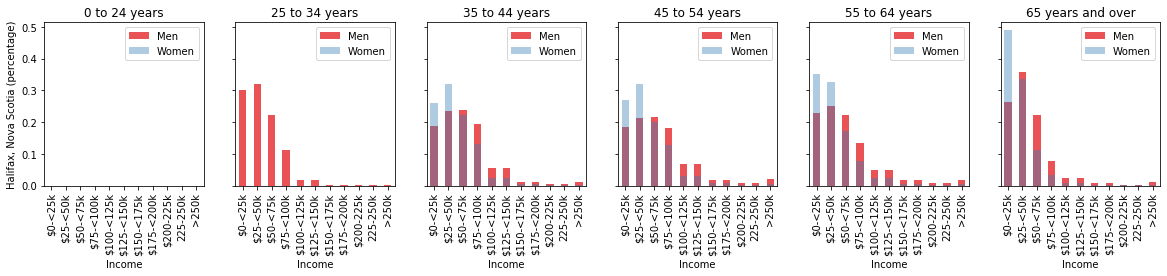

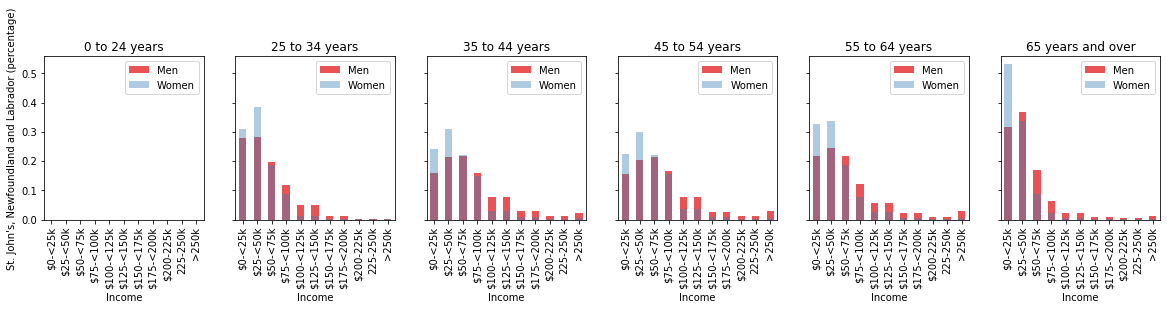

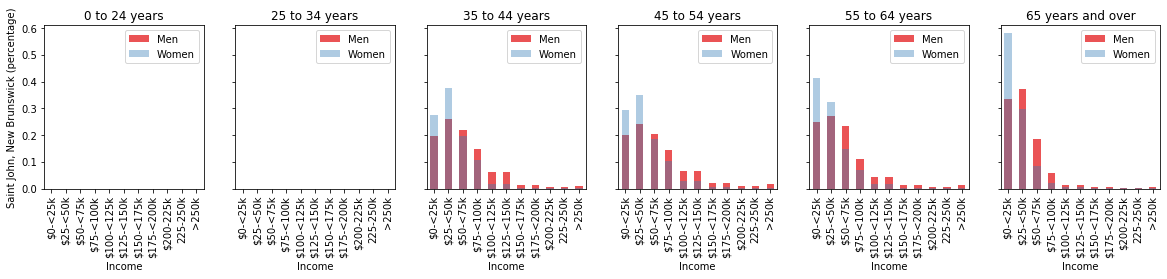

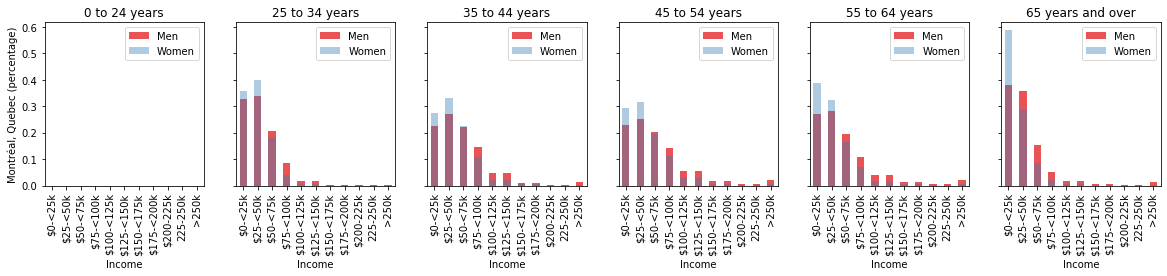

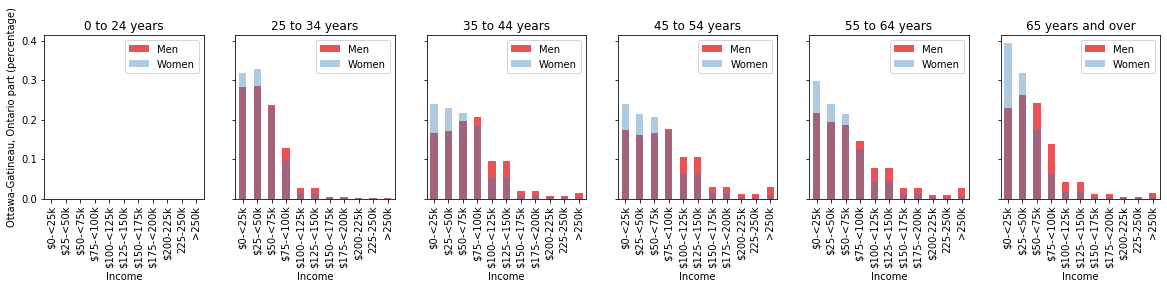

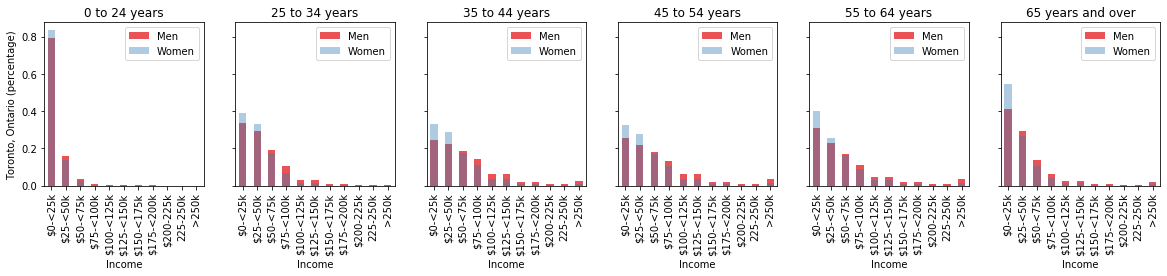

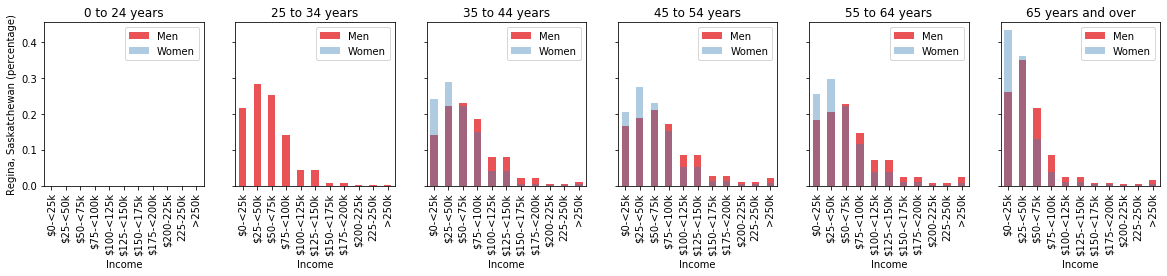

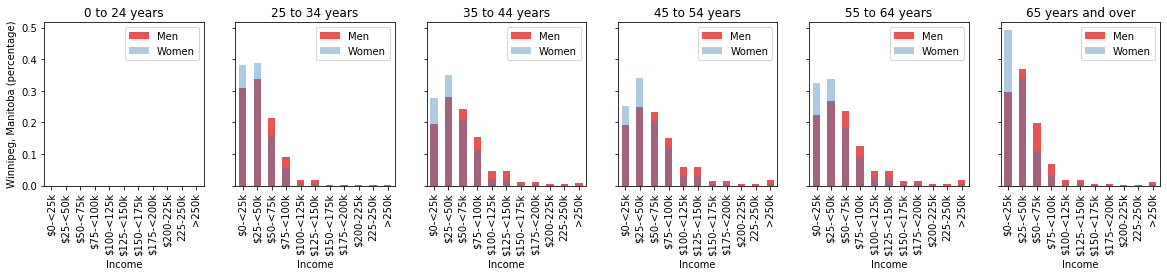

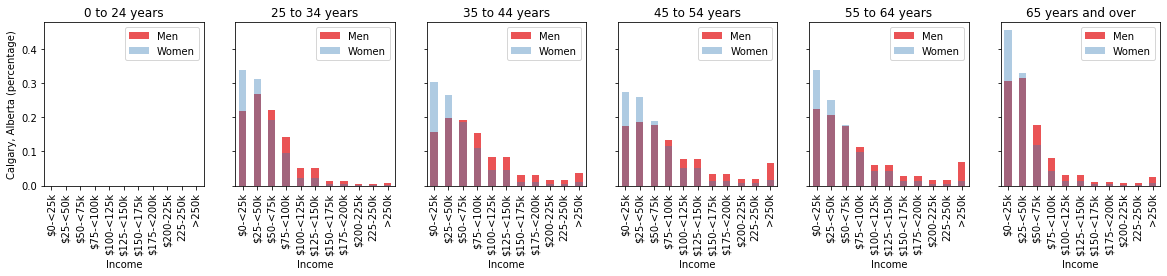

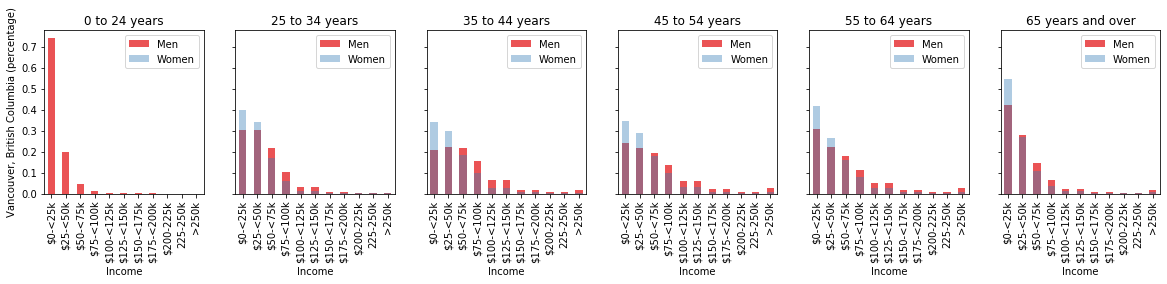

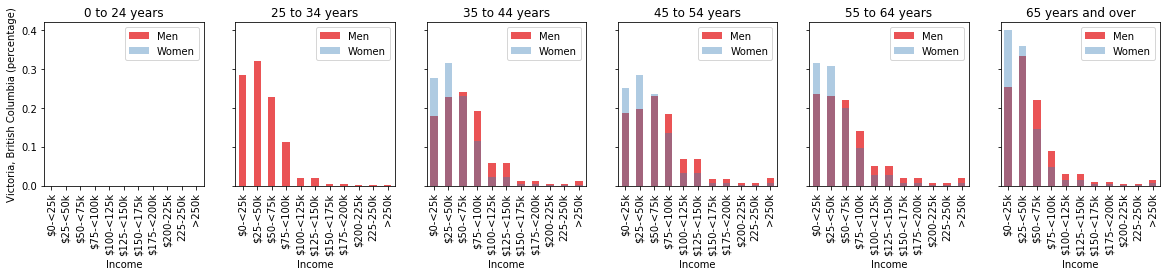

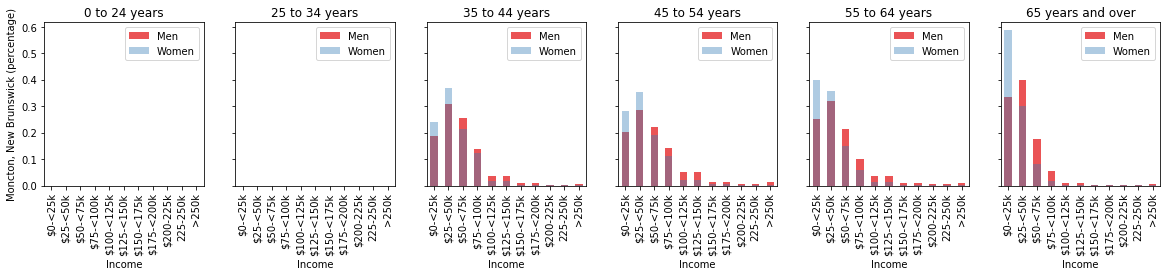

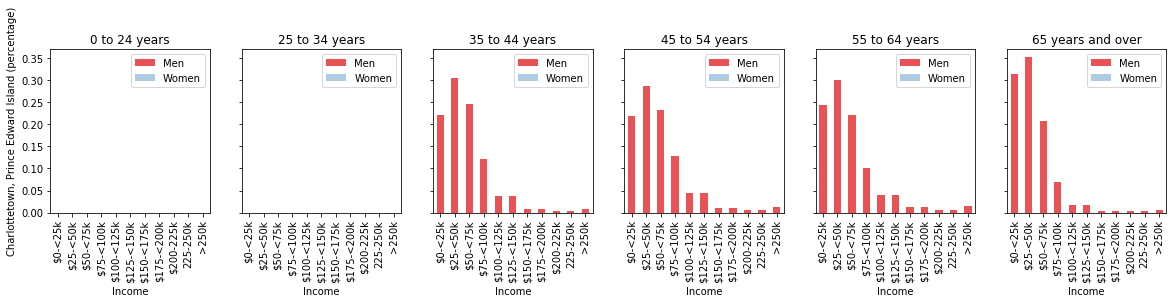

In [4]:
if __name__ == "__main__":
    locations = ["Canada",
            'Halifax, Nova Scotia',
            "St. John's, Newfoundland and Labrador",
            'Saint John, New Brunswick',
            'Montréal, Quebec',
            'Ottawa-Gatineau, Ontario part',
            'Toronto, Ontario',
            'Regina, Saskatchewan',
            'Winnipeg, Manitoba',
            'Calgary, Alberta',
            'Vancouver, British Columbia',
            'Victoria, British Columbia',
            'Moncton, New Brunswick',
            'Charlottetown, Prince Edward Island',
            ]
    
    os.chdir("..")
    root_directory = os.getcwd()
    data_path = "\\data\\processed_data_sample.csv"
    path = root_directory + data_path
    df = pd.read_csv(path)
    
    df.head()
    
    plot_figs_for(locations, df)